In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")
plt.style.available
#plt.style.use('bmh')

['seaborn-whitegrid',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'bmh',
 'ggplot',
 'Solarize_Light2',
 'seaborn-notebook',
 '_classic_test',
 'seaborn-talk',
 'seaborn-colorblind',
 'seaborn-white',
 'classic',
 'fivethirtyeight',
 'seaborn-bright',
 'grayscale',
 'seaborn',
 'seaborn-deep',
 'fast',
 'dark_background',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-ticks',
 'tableau-colorblind10',
 'seaborn-poster',
 'seaborn-dark',
 'seaborn-muted']

Making estimation for covid19 for colombia. Dataset imported daily from:
- The data files for the four metrics we present are available to download here:
- **Total confirmed cases:** https://covid.ourworldindata.org/data/total_cases.csv
- **Total deaths:** https://covid.ourworldindata.org/data/total_deaths.csv
- **New confirmed cases:** https://covid.ourworldindata.org/data/new_cases.csv
- **New deaths:** https://covid.ourworldindata.org/data/new_deaths.csv
- **Full dataset:** https://covid.ourworldindata.org/data/full_data.csv

In [30]:
data_full=pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv")
data_full[data_full["location"]=="Colombia"]

,date,location,new_cases,new_deaths,total_cases,total_deaths
524,2020-03-07,Colombia,NaN,NaN,1.0,NaN
525,2020-03-08,Colombia,0.0,NaN,1.0,NaN
526,2020-03-09,Colombia,0.0,NaN,1.0,NaN
527,2020-03-10,Colombia,2.0,NaN,3.0,NaN
528,2020-03-11,Colombia,0.0,NaN,3.0,NaN
529,2020-03-12,Colombia,6.0,NaN,9.0,NaN
530,2020-03-13,Colombia,0.0,NaN,9.0,NaN
531,2020-03-14,Colombia,7.0,NaN,16.0,NaN
532,2020-03-15,Colombia,8.0,NaN,24.0,NaN
533,2020-03-16,Colombia,0.0,NaN,24.0,NaN


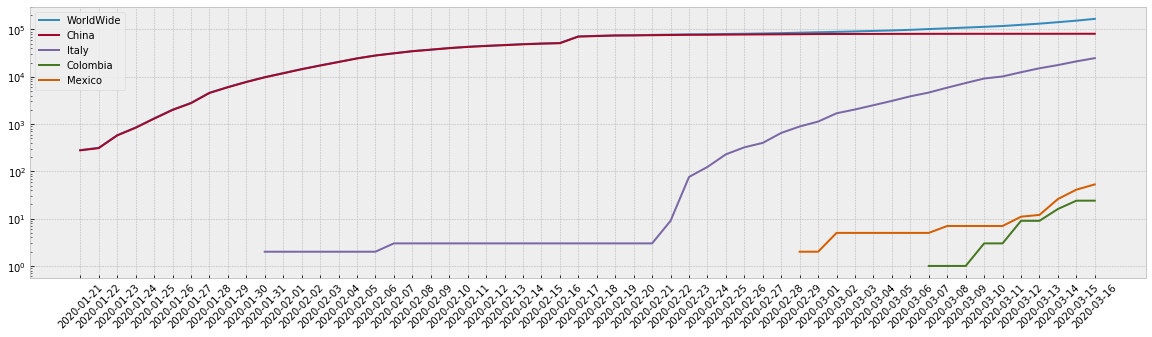

In [31]:
isworldwide=data_full["location"]=="World"
ischina=data_full["location"]=="China"
iscolombia=data_full["location"]=="Colombia"
isitaly=data_full["location"]=="Italy"
ismexico=data_full["location"]=="Mexico"

plt.figure(figsize=(20,5))
plt.plot(data_full["date"][isworldwide],data_full["total_cases"][isworldwide],label="WorldWide")
plt.plot(data_full["date"][ischina],data_full["total_cases"][ischina],label="China")
plt.plot(data_full["date"][isitaly],data_full["total_cases"][isitaly],label="Italy")
plt.plot(data_full["date"][iscolombia],data_full["total_cases"][iscolombia],label="Colombia")
plt.plot(data_full["date"][ismexico],data_full["total_cases"][ismexico],label="Mexico")
plt.xticks(rotation=45)
plt.yscale("log")
plt.legend()
plt.show()

In [4]:
np.unique(data_full["location"])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Dominican Republic',
       'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Guadeloupe', 'Guatemala', 'Guernsey',
       'Guinea', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'International', 'Iran', 'Ira

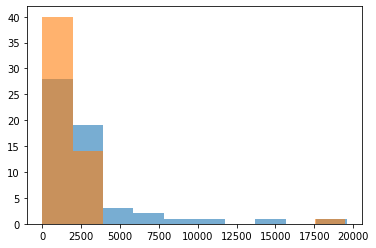

In [5]:
plt.hist(data_full["new_cases"][isworldwide],histtype='stepfilled',alpha=0.6)
plt.hist(data_full["new_cases"][ischina],histtype='stepfilled',alpha=0.6)
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [8]:
dates_world=np.arange(0,len(data_full[isworldwide]),1)
dates_world

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

In [9]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
model = LogisticRegression(solver='newton-cg', random_state=0).fit(dates_world.reshape(-1,1), np.array(data_full[isworldwide]["total_cases"]))

In [11]:
model.classes_

array([   282.,    314.,    581.,    846.,   1320.,   2014.,   2798.,
         4593.,   6065.,   7818.,   9826.,  11953.,  14557.,  17391.,
        20630.,  24544.,  28276.,  31481.,  34886.,  37558.,  40554.,
        43103.,  45171.,  46997.,  49053.,  50580.,  51857.,  71429.,
        73332.,  75204.,  75748.,  76769.,  77794.,  78811.,  79331.,
        80239.,  81109.,  82294.,  83652.,  85403.,  87137.,  88948.,
        90869.,  93090.,  95324.,  98192., 101927., 105592., 109577.,
       113702., 118319., 125260., 132758., 142539., 153523., 167502.])

In [12]:
model.intercept_

array([ 22.10225032,  21.69459083,  21.28456504,  20.87242436,
        20.45545963,  20.03074567,  19.59586863,  19.14896921,
        18.68871587,  18.21397692,  17.72417438,  17.21848664,
        16.69652957,  16.15791012,  15.60200168,  15.02853249,
        14.43693237,  13.82659981,  13.19699657,  12.54752644,
        11.8773054 ,  11.18555938,  10.4714169 ,   9.73395826,
         8.97203853,   8.18454186,   7.3701381 ,   6.52735757,
         5.65472725,   4.75048099,   3.81259018,   2.8389629 ,
         1.82725514,   0.77467461,  -0.32189337,  -1.46592518,
        -2.6614575 ,  -3.91306713,  -5.22590704,  -6.60608671,
        -8.06098517,  -9.59926984, -11.231062  , -12.96866362,
       -14.82756781, -16.82735986, -18.99296126, -21.35725635,
       -23.96562707, -26.88266276, -30.20312203, -34.0725396 ,
       -38.72712999, -44.57482303, -52.37414495, -63.64475133])

In [13]:
model.coef_

array([[-1.55906384],
       [-1.34673626],
       [-1.19744726],
       [-1.08362468],
       [-0.99141722],
       [-0.91334409],
       [-0.84506495],
       [-0.78389789],
       [-0.72810242],
       [-0.6764809 ],
       [-0.62821004],
       [-0.58265666],
       [-0.53936619],
       [-0.49798162],
       [-0.45820316],
       [-0.41980864],
       [-0.38259807],
       [-0.34640327],
       [-0.31108577],
       [-0.27652483],
       [-0.24260349],
       [-0.20922563],
       [-0.17630336],
       [-0.1437576 ],
       [-0.11150968],
       [-0.079491  ],
       [-0.04763247],
       [-0.01586727],
       [ 0.0158648 ],
       [ 0.04762803],
       [ 0.07948922],
       [ 0.1115111 ],
       [ 0.14375878],
       [ 0.17630531],
       [ 0.2092271 ],
       [ 0.2426048 ],
       [ 0.27652836],
       [ 0.31109556],
       [ 0.34641231],
       [ 0.38260171],
       [ 0.41981026],
       [ 0.4582062 ],
       [ 0.49798174],
       [ 0.53936822],
       [ 0.58265606],
       [ 0

In [14]:
model.predict_proba(dates_world.reshape(-1,1))

array([[3.40671226e-01, 2.26616322e-01, 1.50390100e-01, ...,
        3.75707985e-30, 1.54045123e-33, 1.96284406e-38],
       [2.50360978e-01, 2.05937325e-01, 1.58671351e-01, ...,
        4.34728160e-29, 2.06936930e-32, 3.26054883e-37],
       [1.71100469e-01, 1.74033289e-01, 1.55679406e-01, ...,
        4.67776605e-28, 2.58512427e-31, 5.03673379e-36],
       ...,
       [5.02914946e-36, 2.58061496e-31, 4.67656420e-28, ...,
        1.55677593e-01, 1.74031034e-01, 1.71100931e-01],
       [3.25559566e-37, 2.06572177e-32, 4.34621199e-29, ...,
        1.58671230e-01, 2.05930882e-01, 2.50358314e-01],
       [1.95984854e-38, 1.53771755e-33, 3.75622017e-30, ...,
        1.50392576e-01, 2.26606514e-01, 3.40665217e-01]])

In [15]:
model.predict(dates_world.reshape(-1,1))

array([   282.,    282.,    314.,    581.,    846.,   1320.,   2014.,
         2798.,   4593.,   6065.,   7818.,   9826.,  11953.,  14557.,
        20630.,  24544.,  28276.,  31481.,  34886.,  37558.,  40554.,
        43103.,  45171.,  46997.,  49053.,  50580.,  51857.,  71429.,
        73332.,  75204.,  75748.,  76769.,  77794.,  78811.,  79331.,
        80239.,  81109.,  82294.,  83652.,  85403.,  87137.,  88948.,
        93090.,  95324.,  98192., 101927., 105592., 109577., 113702.,
       118319., 125260., 132758., 142539., 153523., 167502., 167502.])

In [16]:
model.score(dates_world.reshape(-1,1), np.array(data_full[isworldwide]["total_cases"]))

0.5357142857142857

## The model
We try to fit model of grows by mean of a logistic equation plus a relaxion term:

$f=\frac{a}{1+e^{-bt+c}}+(1+e^{-dt+e})$

In the case of colombia..

In [17]:
from scipy.optimize import curve_fit
def growth(t,a,b,c):
    return (a)/(1+np.exp(-b*t+c))#+(1+np.exp(-d*t+e))

In [18]:
popt, pcov = curve_fit(growth, np.arange(0,len(data_full["total_cases"][iscolombia]),1), np.array(data_full["total_cases"][iscolombia]))

In [19]:
popt

array([30.84853128,  0.68663325,  4.66572968])

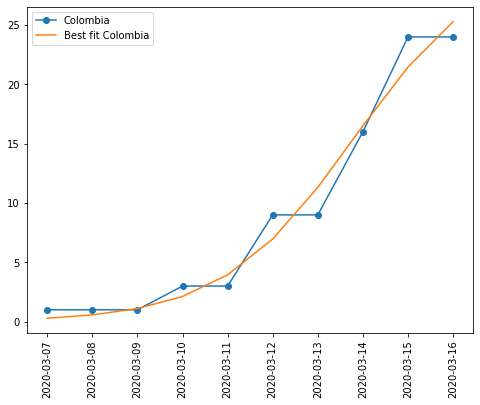

In [20]:
plt.figure(figsize=(8,6))
plt.plot(data_full["date"][iscolombia],data_full["total_cases"][iscolombia],label="Colombia",marker=".",markersize=12)
plt.plot(np.arange(0,len(data_full["total_cases"][iscolombia]),1), growth(np.arange(0,len(data_full["total_cases"][iscolombia]),1), *popt),label="Best fit Colombia")
plt.legend()
plt.xticks(rotation=90)
plt.show()

Estimation for future days.

In [21]:
rng = pd.date_range(data_full["date"][iscolombia].iloc[0], periods=25, freq='D')
df = pd.DataFrame({ 'Date': rng, 'Val': growth(np.arange(0,len(rng),1), *popt) }) 
#df

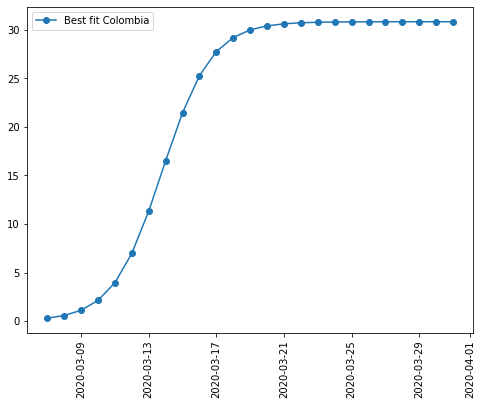

In [22]:
plt.figure(figsize=(8,6))
#plt.plot(data_full["date"][iscolombia],data_full["total_cases"][iscolombia],label="Colombia",marker=".",markersize=12)
plt.plot(df["Date"], df["Val"],label="Best fit Colombia",marker=".",markersize=12)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [23]:
df

,Date,Val
0,2020-03-07,0.287651
1,2020-03-08,0.566353
2,2020-03-09,1.105323
3,2020-03-10,2.121273
4,2020-03-11,3.947106
5,2020-03-12,6.963534
6,2020-03-13,11.315524
7,2020-03-14,16.507600
8,2020-03-15,21.464143
9,2020-03-16,25.284960
